In [1]:
import pickle
import os

In [2]:
dir_path = os.getcwd()

def gen_results_path(filename: str):
    return os.path.join(dir_path, "data/bull_put_spread", filename)

In [48]:
filename = "BullPutSpread_25_10_45_15_100_50_ligth"

In [49]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

43

In [50]:
dates = list(trades.keys())

In [51]:
profits = [t['profit_loss'] for t in trades.values()]

In [52]:
import numpy as np
cumm = np.cumsum(profits)
len(cumm)

43

In [53]:
import matplotlib.pyplot as plt

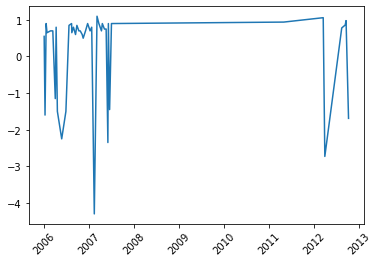

In [54]:
plt.plot(dates, profits)
plt.xticks(rotation = 45)
plt.show()

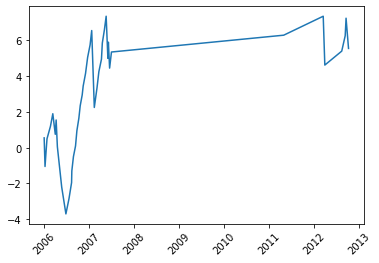

In [55]:
plt.plot(dates, cumm)
plt.xticks(rotation = 45)
plt.show()

In [56]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 5.5500000000000025


In [45]:
average = total_p_l / len(profits)
print(f'Average profit: {average}')

Average profit: 0.20528089887640444


In [46]:
sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))

7.719101123595506

In [47]:
sum([t['max_profit'] for t in trades.values()]) / len(list(trades.values()))

1.9796629213483146